<a href="https://colab.research.google.com/github/gusmaomarcos/machine-learning-avancada/blob/main/DeepLearning_Previsao_com_Keras_bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['font.size'] = 10

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

In [ ]:
def separa_dados(vetor, n_passos):
    x_novo, y_novo = [], []
    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    x_novo, y_novo = np.array(x_novo), np.array(y_novo)
    return x_novo, y_novo

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv"
bike = pd.read_csv(url)

In [ ]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bike['datas'] = pd.to_datetime(bike['datas'])

In [ ]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<Axes: xlabel='datas', ylabel='contagem'>

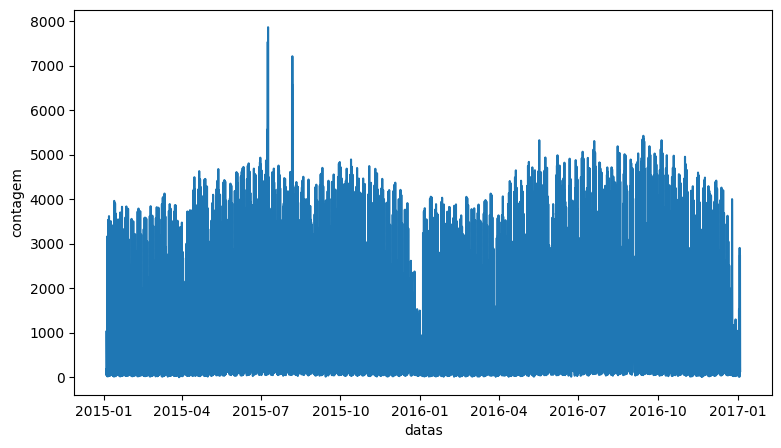

In [ ]:
sns.lineplot(data=bike, x='datas', y='contagem')
#plt.xticks(rotation=70)

In [ ]:
sc2 = StandardScaler()

In [ ]:
sc2.fit(bike['contagem'].values.reshape(-1, 1))

StandardScaler()

In [ ]:
y = sc2.transform(bike['contagem'].values.reshape(-1, 1))

In [ ]:
tamanho_treino = int(len(bike) * 0.9)
tamanho_teste = len(bike)-tamanho_treino

In [ ]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

<Axes: xlabel='datas'>

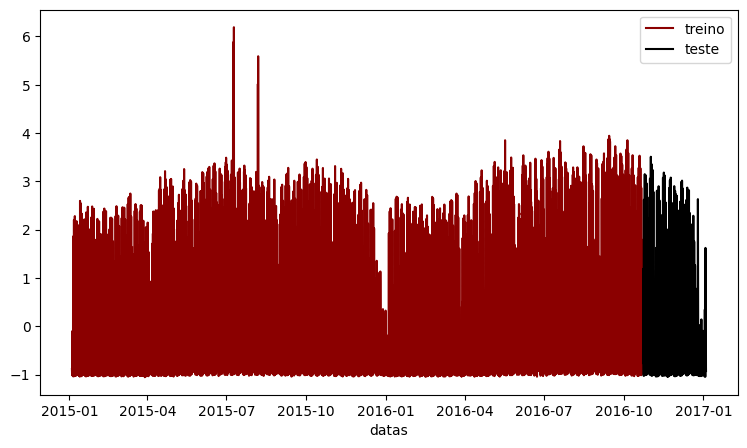

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino', color='darkred')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste', color='k')

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

In [ ]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1], 1))

In [ ]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1], 1))

In [ ]:
recorrente = Sequential()

In [ ]:
xtreino_novo.shape

(15662, 10, 1)

LSTM = Long Short Term Memory

In [ ]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))
#glorot_uniform, initializer padrao da LSTM, trata vanishing gradient

In [ ]:
recorrente.compile(optimizer='RMSProp', loss='mean_squared_error')
#RMSProp trata problema de exploding gradient

In [ ]:
recorrente.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#A Próxima célula demora!

In [ ]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo,
                           validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 17s 26ms/step - loss: 0.2945 - val_loss: 0.1147
Epoch 2/100
490/490 [==============================] - 16s 34ms/step - loss: 0.0868 - val_loss: 0.0485
Epoch 3/100
490/490 [==============================] - 17s 34ms/step - loss: 0.0583 - val_loss: 0.0428
Epoch 4/100
490/490 [==============================] - 11s 23ms/step - loss: 0.0487 - val_loss: 0.0300
Epoch 5/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0440 - val_loss: 0.0402
Epoch 6/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0406 - val_loss: 0.0306
Epoch 7/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0386 - val_loss: 0.0288
Epoch 8/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0368 - val_loss: 0.0241
Epoch 9/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0354 - val_loss: 0.0252
Epoch 10/100
490/490 [==============================] - 9s 19ms/step - loss: 0

In [ ]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 4s 8ms/step


<Axes: xlabel='datas'>

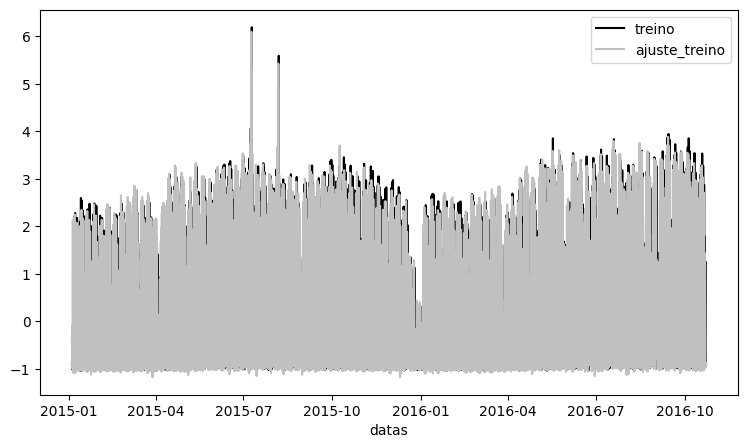

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino', color='k')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label='ajuste_treino', color='silver')

In [ ]:
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 0s 7ms/step


<Axes: xlabel='datas'>

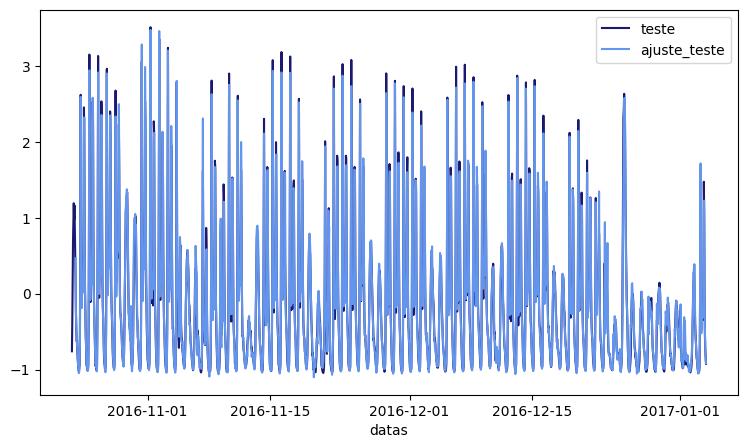

In [ ]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste', color='midnightblue')
sns.lineplot(x='datas', y=y_predito[:,0], data=bike[(tamanho_treino + 10):len(bike)], label='ajuste_teste', color='cornflowerblue')

<Axes: xlabel='datas'>

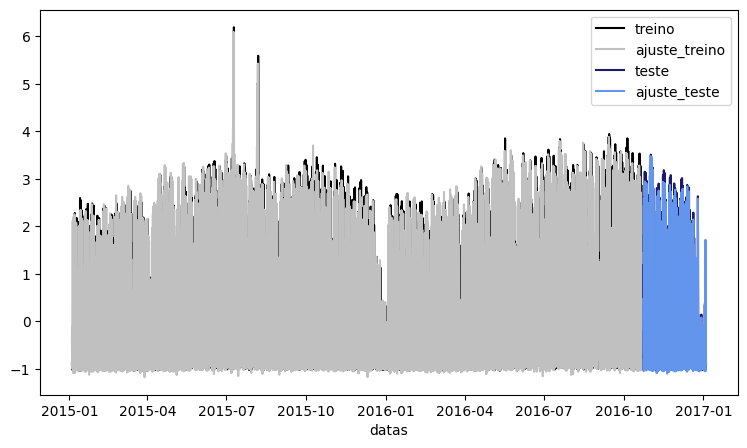

In [ ]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino', color='k')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label='ajuste_treino', color='silver')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste', color='midnightblue')
sns.lineplot(x='datas', y=y_predito[:,0], data=bike[(tamanho_treino + 10):len(bike)], label='ajuste_teste', color='cornflowerblue')

In [ ]:
recorrente_g = Sequential()

In [ ]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [ ]:
recorrente_g.compile(optimizer='RMSProp', loss='mean_squared_error')

In [ ]:
recorrente.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
recorrente_g.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Próxima célula, fit da GRU (Unidade recorrente fechada), demora! Mas não tanto quanto a LSTM, por ter menos parâmetros.

In [ ]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo,
                           validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 11s 18ms/step - loss: 0.2307 - val_loss: 0.0725
Epoch 2/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0720 - val_loss: 0.0417
Epoch 3/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0524 - val_loss: 0.0335
Epoch 4/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0454 - val_loss: 0.0313
Epoch 5/100
490/490 [==============================] - 7s 15ms/step - loss: 0.0416 - val_loss: 0.0313
Epoch 6/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0385 - val_loss: 0.0240
Epoch 7/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0365 - val_loss: 0.0225
Epoch 8/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0348 - val_loss: 0.0281
Epoch 9/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0340 - val_loss: 0.0206
Epoch 10/100
490/490 [==============================] - 6s 13ms/step - loss: 0.03

In [ ]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 1s 5ms/step


<Axes: xlabel='datas'>

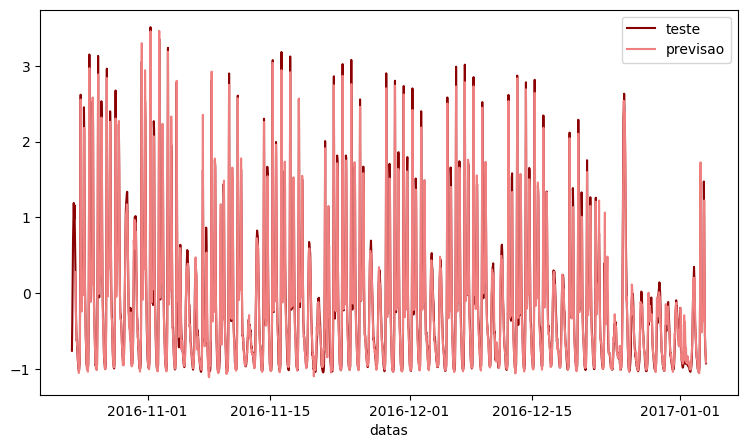

In [ ]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste', color='darkred')
sns.lineplot(x='datas', y=y_predito2[:,0], data=bike[(tamanho_treino + 10):len(bike)], label='previsao', color='lightcoral')

In [ ]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


Text(0.5, 1.0, 'LSTM')

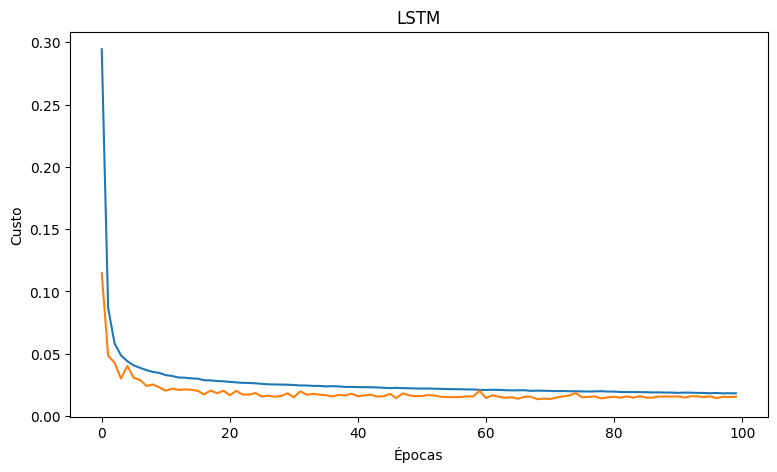

In [ ]:
#LSTM
plt.plot(resultado.history['loss'], label='treino')
plt.plot(resultado.history['val_loss'], label='teste')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.title('LSTM')

Text(0.5, 1.0, 'GRU')

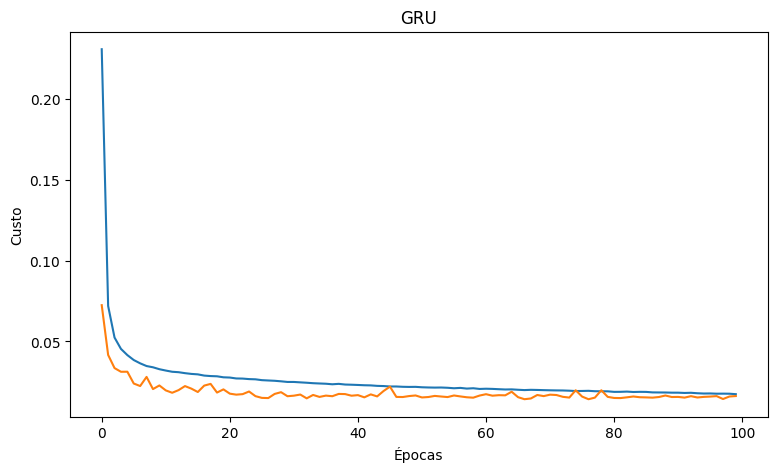

In [ ]:
#GRU
plt.plot(resultado2.history['loss'], label='treino')
plt.plot(resultado2.history['val_loss'], label='teste')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.title('GRU')

Foi escolhido o RMSProp como otimizador dos pesos no treinamento da rede
neural. O objetivo foi utilizar um otimizador adaptativo. Um otimizador adaptativo é capaz de controlar o gradiente e evitar que este cresça ou diminua muito. Entretanto, a escolha do RMSProp foi feita para chamar a atenção sobre o otimizador. Tanto o Adam quanto o RMSProp são adaptativos e seriam boas escolhas para a solução do problema.